<h1><center>What is Loss Function ?</center></h1>

This notebook will present the different loss functions for classification and regression problems. 

<h2>0 - Packages</h2>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf

<h2>I - Data</h2>

<h3>I.1 - Classification Data</h3>

<h4>I.1.1 - Binary</h4>

The simple way to generate data to test our different models with our different loss functions is to use the functions provided by <i>sklearn</i>. Three functions are available in <i><a href=https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets>sklearn.datasets</a></i> as <a href=https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification>make_classification</a>, <a href=https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression>make_regression</a> and <a href=https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html>make_blobs</a>. 

In [28]:
X_bin, Y_bin = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1,  random_state=42)

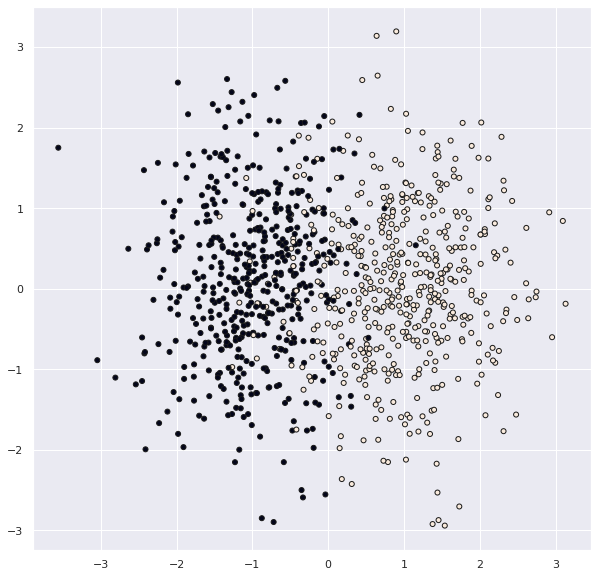

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(X_bin[:, 0], X_bin[:, 1], marker='o', c=Y_bin,
            s=25, edgecolor='k')

<h4>I.1.2 - Multiclass</h4>

In [31]:
# generate dataset
X_multi, Y_multi = make_blobs(n_samples=5000, centers=3, n_features=2, cluster_std=2, random_state=42)

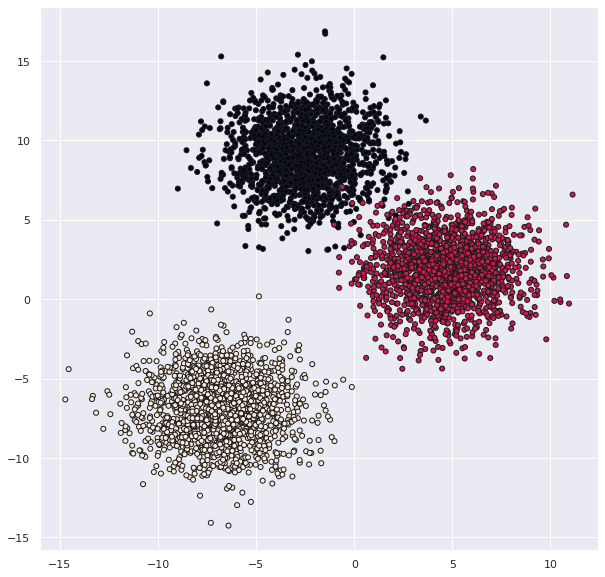

In [33]:
plt.figure(figsize=(10,10))
plt.scatter(X_multi[:, 0], X_multi[:, 1], marker='o', c=Y_multi,
            s=25, edgecolor='k')

In [391]:
# Make a 80/20 train/test 
X_class_train, X_class_test, Y_class_train, Y_class_test = train_test_split(X_multi, Y_multi, test_size=0.2, random_state=42) 

In [392]:
Y_class_train = to_categorical(Y_class_train)
Y_class_test  = to_categorical(Y_class_test)

<h3>I.2 Regression Data</h3>

In [84]:
# generate regression dataset
X_reg, Y_reg = make_regression(n_samples=10000, n_features=20, noise=0.1, random_state=1)
# Normalised the dataset
X_reg = StandardScaler().fit_transform(X_reg)
Y_reg = StandardScaler().fit_transform(Y_reg.reshape(len(Y_reg),1))[:,0]

In [85]:
# Make a 80/20 train/test 
X_reg_train, X_reg_test, Y_reg_train, Y_reg_test = train_test_split(X_reg, Y_reg, test_size=0.2, random_state=42) 

In [42]:
Y_reg

array([ 0.08797332,  1.62669268, -0.00166004, ..., -0.51528731,
       -0.06122649, -0.61726465])

In [61]:
len(X_reg_train), len(Y_reg_train), len(X_reg_test), len(Y_reg_test)

(8000, 8000, 2000, 2000)

<h2>II - Models</h2>

Here we will define the different models that we'll call with the different loss functions. 

Little configurations: 

In [180]:
# Config an early stopping callbacks 
es = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='auto', patience=3)

<h3>II.1 - Classification</h3>

In [178]:
def classification_binary_nn(loss):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(50, input_dim=20,  activation="relu"))
    model.add(tf.keras.layers.Dense(1,  activation="sigmoid"))
    model.compile(loss=loss,  optimizer=tf.keras.optimizers.RMSprop(lr=1e-4), metrics=["accuracy"])
    
    return model

In [384]:
def classification_multiclass_nn(loss, nb_class=3):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(50, input_dim=2,  activation="relu"))
    model.add(tf.keras.layers.Dense(nb_class,  activation="softmax"))
    model.compile(loss=loss,  optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum=0.9), metrics=["accuracy"])
    
    return model

<h3>II.2 - Regression</h3>

In [285]:
def regression_nn(loss):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(25, input_dim=20,  activation="relu"))
    model.add(tf.keras.layers.Dense(1,  activation="linear"))
    model.compile(loss=loss,  optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum=0.9), metrics=["mse"])
    
    return model

<h2>Loss Functions</h2>

<h3>III.1 - Classification</h3>

<h5><u>Exponential Loss</u></h5>

In [35]:
def exponential(yHat, y):
    #print(yHat, y)
    return np.exp([- yHat * y])

In [36]:
y = np.linspace(-10, 10, 1000)
y_true = [1 for _ in range(len(y))]

In [38]:
y_pred = [exponential(y_true[i], y[i]) for i in range(len(y))]

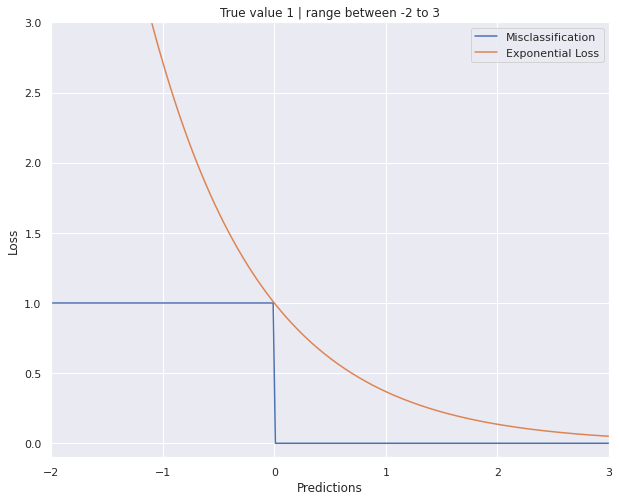

In [39]:
plt.figure(figsize=(10,8))
plt.plot(y, y_, label="Misclassification")
plt.plot(y, y_pred, label="Exponential Loss")
plt.legend()
plt.xlim(-2, 3)
plt.ylim(-0.1, 3)
plt.xlabel("Predictions")
plt.ylabel("Loss")
plt.title("True value 1 | range between -2 to 3")
plt.savefig("../fig_articles/hinge.jpeg")

<h5><u>Hinge Loss</u></h5>

In [23]:
def Hinge(yHat, y):
    #print(yHat, y)
    return np.max([0., 1. - yHat * y])

In [4]:
y = np.linspace(-10, 10, 1000)
y_true = [1 for _ in range(len(y))]

In [25]:
y_pred = [Hinge(y_true[i], y[i]) for i in range(len(y))]

In [29]:
y_ = [1 if i<=0 else 0 for i in y ]

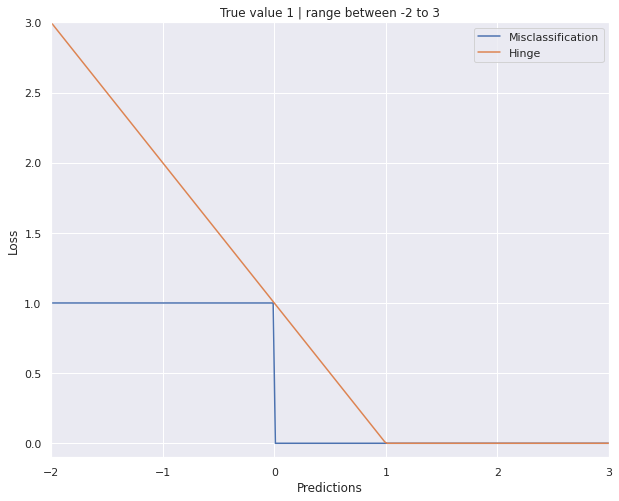

In [34]:
plt.figure(figsize=(10,8))
plt.plot(y, y_, label="Misclassification")
plt.plot(y, y_pred, label="Hinge")
plt.legend()
plt.xlim(-2, 3)
plt.ylim(-0.1, 3)
plt.xlabel("Predictions")
plt.ylabel("Loss")
plt.title("True value 1 | range between -2 to 3")
plt.savefig("../fig_articles/hinge.jpeg")

<h5><u>Cross-entropy</u></h5>

In [441]:
def cross_entropy(y_true, y_pred):
    return  y_true*np.log(y_pred)+(np.ones(len(y_true))-y_true)*np.log(np.ones(len(y_true))-y_pred) 

In [456]:
model_class = classification_multiclass_nn(tf.keras.losses.CategoricalCrossentropy(), nb_class=3)

In [457]:
history = model_class.fit(X_class_train, Y_class_train, callbacks=[es], epochs=1000, validation_data=(X_class_test, Y_class_test), verbose=1)

Epoch 1/1000
125/125 [==============================] - 0s 4ms/step - loss: 0.0811 - accuracy: 0.9672 - val_loss: 0.0237 - val_accuracy: 0.9900
Epoch 2/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0228 - accuracy: 0.9918 - val_loss: 0.0204 - val_accuracy: 0.9910
Epoch 3/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0219 - accuracy: 0.9923 - val_loss: 0.0211 - val_accuracy: 0.9920
Epoch 4/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.0206 - accuracy: 0.9930 - val_loss: 0.0184 - val_accuracy: 0.9920
Epoch 5/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 0.9933 - val_loss: 0.0174 - val_accuracy: 0.9920
Epoch 6/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 0.9937 - val_loss: 0.0161 - val_accuracy: 0.9920
Epoch 7/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.0184 - accuracy: 0.9935 - val_loss: 0.0160 - val_accuracy:

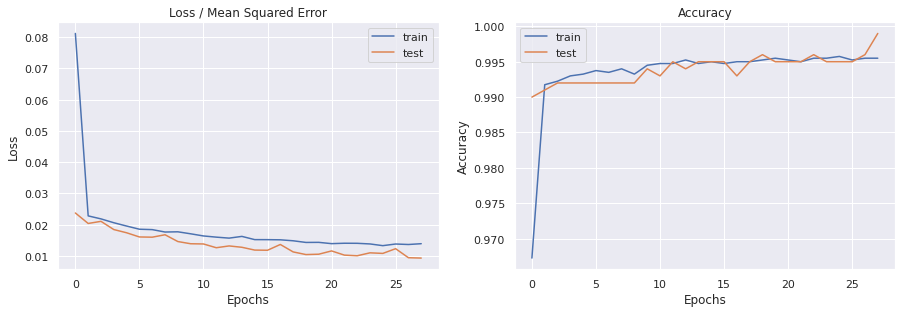

In [460]:
# plot loss during training
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
#plt.show()

plt.subplot(222)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

In [458]:
y_pred = model_class.predict(X_class_test)

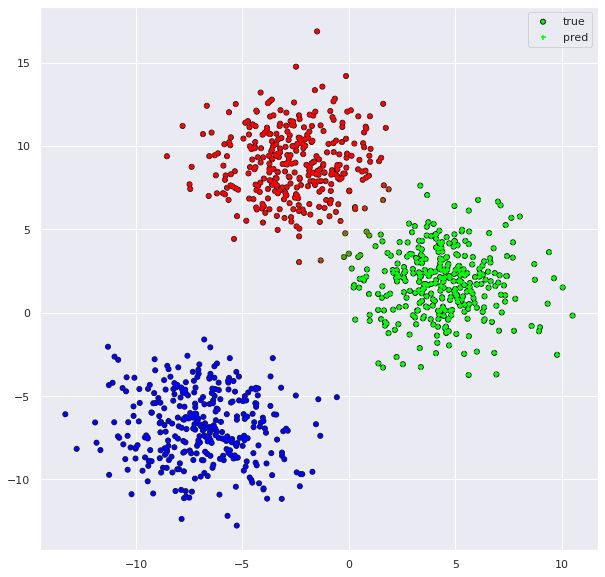

In [459]:
plt.figure(figsize=(10,10))
plt.scatter(X_class_test[:, 0], X_class_test[:, 1], marker='o', c=Y_class_test,
            s=25, edgecolor='k', label="true")
plt.scatter(X_class_test[:, 0], X_class_test[:, 1], marker='+', c=y_pred,
            s=25, edgecolor='k', label="pred")
plt.legend()

<h5><u>Kullback–Leibler (KL) Divergence Loss</u></h5>

In [337]:
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0) )# np.sum() 

In [430]:
def kl_divergence(y_true, y_pred):
    return y_true * np.log(y_true / y_pred)

In [431]:
y_pred = np.linspace(-1, 10000, 1000)
y_true = [100 for _ in y_pred]
results = kl_divergence(y_true , y_pred)

<ipython-input-430-5821c8033c68>:2: RuntimeWarning: invalid value encountered in log
  return y_true * np.log(y_true / y_pred)


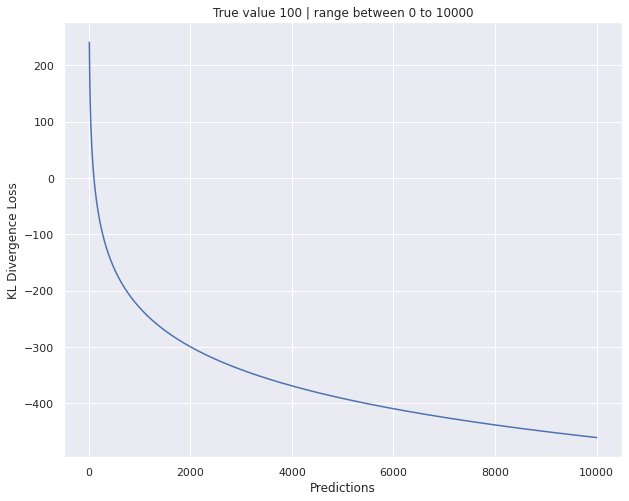

In [433]:
plt.figure(figsize=(10,8))
plt.plot(y_pred, results)
plt.xlabel("Predictions")
plt.ylabel("KL Divergence Loss")
plt.title("True value 100 | range between 0 to 10000")
#plt.savefig("../fig_articles/KL_divergence.jpeg")

In [395]:
model_class = classification_multiclass_nn(tf.keras.losses.KLDivergence(), nb_class=3)

In [377]:
from keras.utils import to_categorical

In [396]:
history = model_class.fit(X_class_train, Y_class_train, callbacks=[es], epochs=1000, validation_data=(X_class_test, Y_class_test), verbose=1)

Epoch 1/1000
125/125 [==============================] - 1s 6ms/step - loss: 0.0549 - accuracy: 0.9810 - val_loss: 0.0235 - val_accuracy: 0.9910
Epoch 2/1000
125/125 [==============================] - 0s 4ms/step - loss: 0.0241 - accuracy: 0.9915 - val_loss: 0.0245 - val_accuracy: 0.9910
Epoch 3/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9927 - val_loss: 0.0193 - val_accuracy: 0.9920
Epoch 4/1000
125/125 [==============================] - 0s 4ms/step - loss: 0.0206 - accuracy: 0.9935 - val_loss: 0.0175 - val_accuracy: 0.9920
Epoch 5/1000
125/125 [==============================] - 1s 9ms/step - loss: 0.0196 - accuracy: 0.9935 - val_loss: 0.0183 - val_accuracy: 0.9920
Epoch 6/1000
125/125 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9940 - val_loss: 0.0162 - val_accuracy: 0.9950
Epoch 7/1000
125/125 [==============================] - 0s 4ms/step - loss: 0.0189 - accuracy: 0.9935 - val_loss: 0.0166 - val_accuracy:

In [401]:
y_pred = model_class.predict(X_class_test)

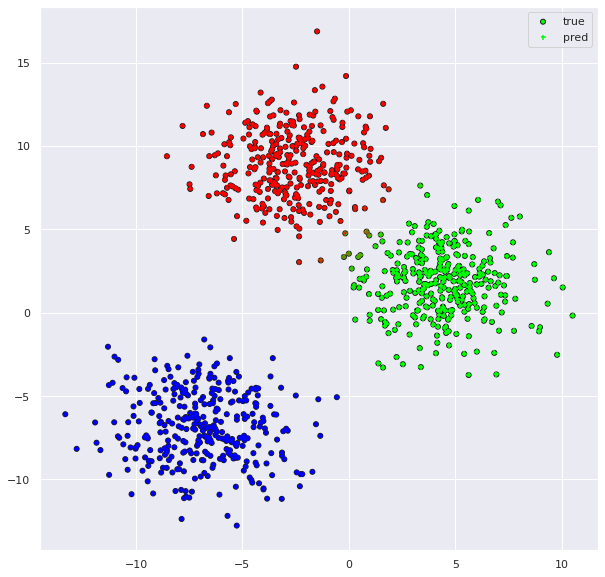

In [429]:
plt.figure(figsize=(10,10))
plt.scatter(X_class_test[:, 0], X_class_test[:, 1], marker='o', c=Y_class_test,
            s=25, edgecolor='k', label="true")
plt.scatter(X_class_test[:, 0], X_class_test[:, 1], marker='+', c=y_pred,
            s=25, edgecolor='k', label="pred")
plt.legend()

In [403]:
y_ = kl_divergence(Y_class_test, y_pred)

Text(0.5, 1.0, 'True value 100 | range between -100000 to 10000')

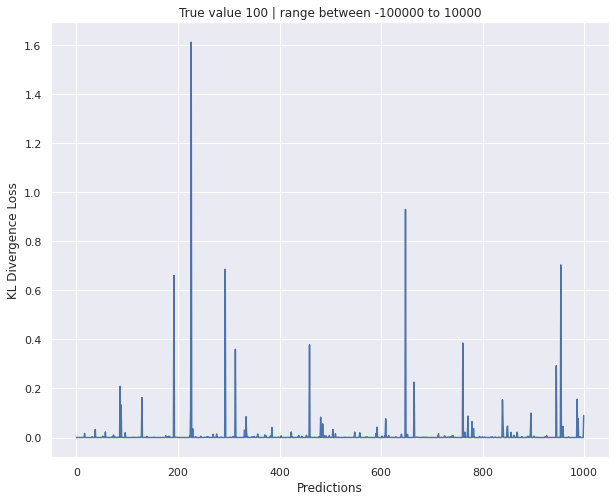

In [420]:
plt.figure(figsize=(10,8))
plt.plot(list(range(y_.shape[0])), [i[tf.argmax(i)].numpy() for i in y_])
plt.xlabel("Predictions")
plt.ylabel("KL Divergence Loss")
plt.title("True value 100 | range between -100000 to 10000")

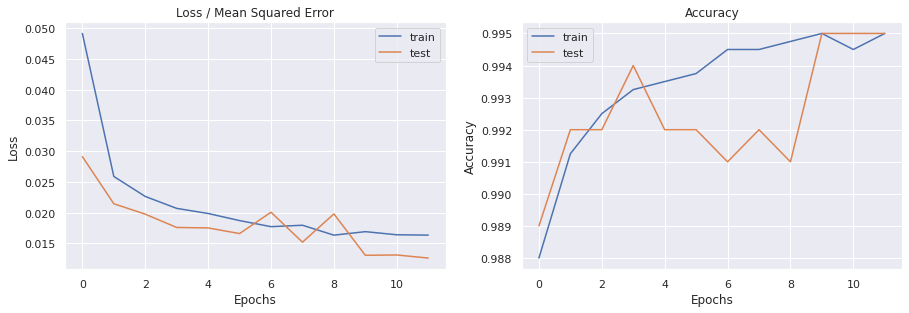

In [387]:
# plot loss during training
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
#plt.show()

plt.subplot(222)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

<h3>III.1 - Regression</h3>

<h5><u>Mean Square Error Loss (MSE - L2)</u></h5>

In [76]:
import keras.backend as K

In [326]:
# custom MSE loss function 
def mean_square_error(y_true, y_pred):
    return K.mean(K.square(y_pred-y_true),  axis=-1 )# / y_true.shape

In [327]:
y_pred = np.linspace(-10000, 10000, 1000)
y_true = [100 for _ in y_pred]
results = K.square(y_true - y_pred)

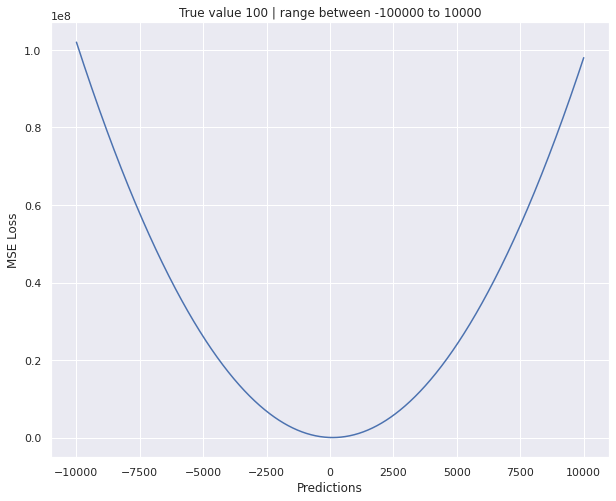

In [328]:
plt.figure(figsize=(10,8))
plt.plot(y_pred, results)
plt.xlabel("Predictions")
plt.ylabel("MSE Loss")
plt.title("True value 100 | range between -100000 to 10000")
#plt.savefig("../fig_articles/mse_loss.jpeg")

In [171]:
model_regression = regression_nn(mean_square_error)

In [172]:
history = model_regression.fit(X_reg_train, Y_reg_train, callbacks=[es], epochs=1000, validation_data=(X_reg_test, Y_reg_test), verbose=0)

In [173]:
train_mse = model_regression.evaluate(X_reg_train, Y_reg_train, verbose=0)
test_mse = model_regression.evaluate(X_reg_test, Y_reg_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse[0], test_mse[0]))

Train: 0.000, Test: 0.000


In [174]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


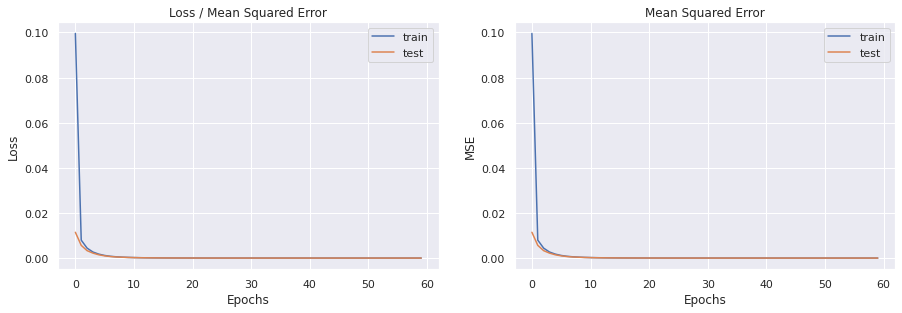

In [176]:
# plot loss during training
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
#plt.show()

plt.subplot(222)
plt.title('Mean Squared Error')
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.grid(True)
plt.legend()
plt.show()


<h5><u>Mean Absolute Error (MAE - L1)</u></h5>

In [323]:
# custom MSE loss function 
def mean_absolute_error(y_true, y_pred):
    return K.mean(K.abs(y_pred-y_true),  axis=-1 )# / y_true.shape

In [324]:
y_pred = np.linspace(-10000, 10000, 1000)
y_true = [100 for _ in y_pred]
results = K.abs(y_true - y_pred)

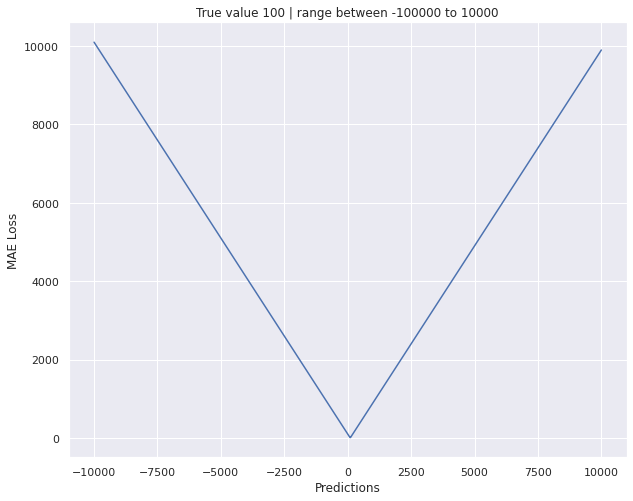

In [325]:
plt.figure(figsize=(10,8))
plt.plot(y_pred, results)
plt.xlabel("Predictions")
plt.ylabel("MAE Loss")
plt.title("True value 100 | range between -100000 to 10000")
#plt.savefig("../fig_articles/mae_loss.jpeg")

In [183]:
model_regression = regression_nn(mean_absolute_error)

In [184]:
history = model_regression.fit(X_reg_train, Y_reg_train, callbacks=[es], epochs=1000, validation_data=(X_reg_test, Y_reg_test), verbose=0)

In [185]:
train_mse = model_regression.evaluate(X_reg_train, Y_reg_train, verbose=0)
test_mse = model_regression.evaluate(X_reg_test, Y_reg_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse[0], test_mse[0]))

Train: 0.026, Test: 0.026


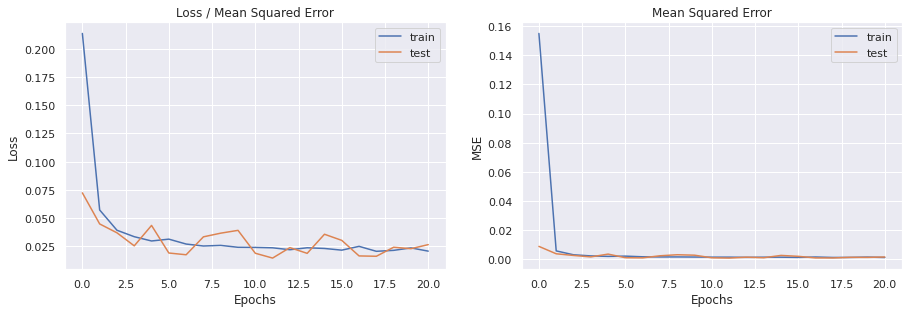

In [204]:
# plot loss during training
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
#plt.show()

plt.subplot(222)
plt.title('Mean Squared Error')
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.grid(True)
plt.legend()
plt.show()


<h5><u>Huber Loss (Smooth Mean Absolute Error)</u></h5>

In [312]:
# custom huber loss function 
def huber_loss_error(y_true, y_pred, delta=0.1):
    res = []
    for i in zip(y_true, y_pred):
        if abs(i[0]-i[1])<=delta:
            res.append(0.5*((i[0]-i[1])**2))
        else:
            res.append(delta*((abs(i[0]-i[1]) )-0.5*(delta**2)))
    # can also be write as:
    # np.where(np.abs(y_true-y_pred) < delta, 0.5*(y_true-y_pred)**2 , delta*(np.abs(y_true-y_pred)-0.5*delta))
    return res # np.sum(res)

In [319]:
y_pred = np.linspace(-10, 10, 1000)
y_true = [0 for _ in y_pred]
results_10 = huber_loss_error(y_true, y_pred, delta=10)
results_1 = huber_loss_error(y_true, y_pred, delta=1)
results_01 = huber_loss_error(y_true, y_pred, delta=0.10)
results_05 = huber_loss_error(y_true, y_pred, delta=0.5)

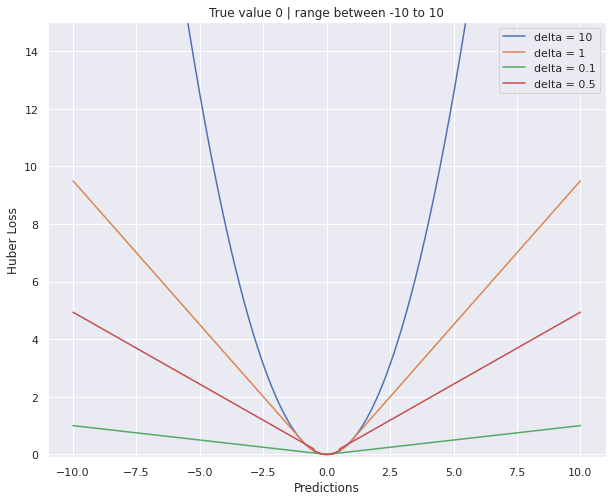

In [321]:
plt.figure(figsize=(10,8))
plt.plot(y_pred, results_10, label="delta = 10")
plt.plot(y_pred, results_1, label="delta = 1")
plt.plot(y_pred, results_01, label="delta = 0.1")
plt.plot(y_pred, results_05, label="delta = 0.5")

plt.legend()
plt.ylim(-0.1, 15)
plt.xlabel("Predictions")
plt.ylabel("Huber Loss")
plt.title("True value 0 | range between -10 to 10")
#plt.savefig("../fig_articles/huber_loss.jpeg")

In [257]:
model_regression = regression_nn(tf.keras.losses.Huber())

In [258]:
history = model_regression.fit(X_reg_train, Y_reg_train, callbacks=[es], epochs=1000, validation_data=(X_reg_test, Y_reg_test), verbose=0)

In [259]:
train_mse = model_regression.evaluate(X_reg_train, Y_reg_train, verbose=0)
test_mse = model_regression.evaluate(X_reg_test, Y_reg_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse[0], test_mse[0]))

Train: 0.000, Test: 0.000


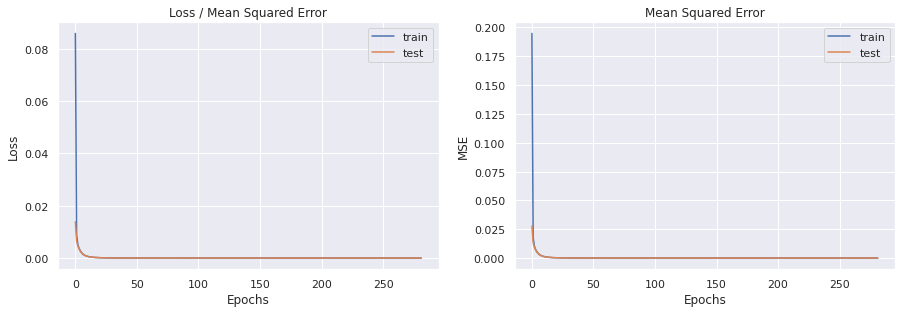

In [260]:
# plot loss during training
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
#plt.show()

plt.subplot(222)
plt.title('Mean Squared Error')
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.grid(True)
plt.legend()
plt.show()


In [298]:
# custom MSE loss function 
def mean_square_Log_error(y_true, y_pred):
    return K.square(K.log(y_pred+np.ones(len(y_pred.shape)))-K.log(y_true+np.ones(len(y_pred.shape)))) # / y_true.shape

In [303]:
y_pred = np.linspace(-1, 10, 1000)
y_true = [0 for _ in y_pred]
results =mean_square_Log_error(y_true, y_pred)


Text(0.5, 1.0, 'True value 0 | range between -10 to 10')

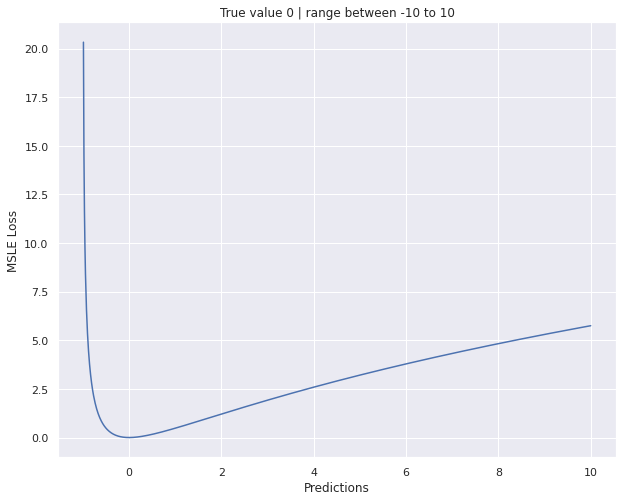

In [304]:
plt.figure(figsize=(10,8))
plt.plot(y_pred, results)
plt.xlabel("Predictions")
plt.ylabel("MSLE Loss")
plt.title("True value 0 | range between -1 to 10")

In [305]:
model_regression = regression_nn(tf.keras.losses.MeanSquaredLogarithmicError())

In [306]:
history = model_regression.fit(X_reg_train, Y_reg_train, callbacks=[es], epochs=1000, validation_data=(X_reg_test, Y_reg_test), verbose=0)

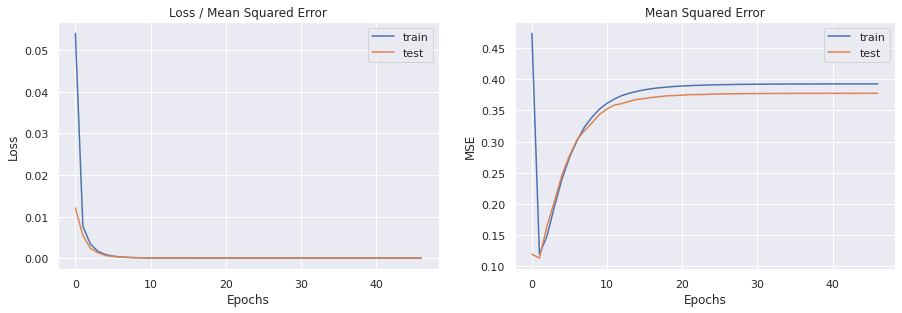

In [307]:
# plot loss during training
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
#plt.show()

plt.subplot(222)
plt.title('Mean Squared Error')
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.grid(True)
plt.legend()
plt.show()


<h5><u>Log-Cosh Loss</u></h5>

In [329]:
# log cosh loss
def logcosh(y_true, y_pred):
    loss = np.log(np.cosh(y_pred - y_true))
    return loss

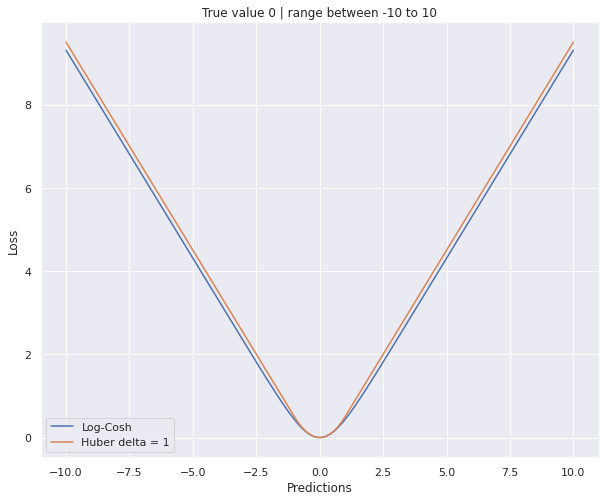

In [335]:
y_pred = np.linspace(-10, 10, 1000)
y_true = [0 for _ in y_pred]
results =logcosh(y_true, y_pred)

plt.figure(figsize=(10,8))
plt.plot(y_pred, results, label="Log-Cosh")
plt.plot(y_pred, results_1, label="Huber delta = 1")
plt.legend()
plt.xlabel("Predictions")
plt.ylabel("Loss")
plt.title("True value 0 | range between -10 to 10")
plt.savefig("../fig_articles/compa_huber_logcosh.jpeg")